# Analyze Dashboard Data



Please run cell by cell following the instructions.

First load the .yaml file that was computed by the hw_check you ran earlier. For this, change the variable `hw_check_yaml_name` below to the name your file has (Ex. `CH_ETHZ_Linus_2020-05-05_DB18_hardware-compliance`)

In [2]:
hw_check_yaml_name = 'CH_ETHZ_Linus_2020-05-05_DB18_hardware-compliance'

In [5]:
import yaml
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from os import path, listdir
experiment_dir = ''

# Path, to where the result files should be saved
logs_path = path.join(experiment_dir, '../data/BenchmarkXY')
outdir = path.join(logs_path, 'out')
# Dictionary containing all the information
eng_data_all = {}


def save_data():
    eng_perf_data = path.join(outdir, 'eng_perf_data.yaml')


    with open(eng_perf_data, 'w') as yaml_file:
        yaml.dump(summary, yaml_file, default_flow_style=False)


    # Path and name of the created yaml file, the file 'BAGNAME_eng_perf_data_all.yaml' can be found
    # in the folder behaviour_benchmarking/data/BenchmarkXY/out
    eng_perf_data_all = path.join(outdir, name + '_eng_perf_data_all.yaml')

    # Safe the eng_data_all dictionary in a yaml file called eng_perf_data_all.yaml    
    with open(eng_perf_data_all, 'w') as yaml_file:
        yaml.dump(eng_data_all, yaml_file, default_flow_style=False)   

        
hw_check_yaml_file = r'../data/BenchmarkXY/' + hw_check_yaml_name + '.yaml'

hw_info = {'item': 'documentation'}

with open(hw_check_yaml_file) as file:
    documents = yaml.full_load(file)
    hostname = documents["hostname"]
    for item, doc in documents.items():
        hw_info.update({item: doc})
        print(item, ":", doc)

eng_data_all.update({'HW_info': hw_info}) 
        
hostname_minus = hostname+'-'
hostname_underline = hostname+'_'

verdict : True
hostname : autobot01
db_version : DB18
date : 2020-05-05
country : CH
institution : ETHZ
mac-adress : b8:27:eb:e2:65:35
platform : RPI3B+
hat_version : Duckiebot Hut
usb-memory : No USB memory detected!
sd-memory : 32GB
battery : Duckiebattery v. 1.0
actuation : DG01D dual-axis drive gear (48:1)
wheel_type : Type 1
camera : Waveshare Raspberry Pi Camera
led_type : Type 1
tester_name : Linus


If you did not record a bag on the Duckiebot, please set the variable `db_data` below to `False`. If you did record a bag on the Duckiebot at least once and you successfully ran rosbag analysis with it set it to `True`.

If you did not run the Diagnostic toolbox during any experiment please set the variable `diag_toolbox_data` below to `False`. If you did run the diagnostic toolbox at least once please set it to `True`.

In [ ]:
db_data = True
diag_toolbox_data = True

Run the next cell such that the upload button appears. Then click on the button and select the `BAGNAME_duckiebot_node_info.json` file that you should find within the folder `data/BenchmarkXY/json`.
Make sure that after selecting the file, you click into the cell below the upload button before continuing to run. 

In [35]:
from ipywidgets import FileUpload
node_inf = FileUpload(accept='.json',
    multiple=False)
node_inf

FileUpload(value={}, accept='.json', description='Upload')

Make sure you click into the cell below after you selected the correct .json file.

In [36]:
import json
import yaml
import matplotlib.pyplot as plt
from scipy import interpolate
import statistics

# extracts BAGNAME
name = next(iter(node_inf.value))
name = name.replace("_node_info.json","")



assert node_inf.data, 'File missing, please upload in above cell'
data = json.loads(node_inf.data[0].decode('utf-8'))
dict_total = {}

# This loads the file and saves all the informations about the nodes into the eng_data_all dictionary 
for i in range(0,len(data['node'])):
    dict_cur = {'frequency (Hz)': data['frequency'][i], 'message_count': data['message_count'][i], 'connections': data['connections'][i]}
    node_name = data['node'][i]
    dict_total[node_name] = dict_cur
    

eng_data_all.update({'Node Info': dict_total})    


Run the next cell such that the upload button appears. Then click on the button and select the `BAGNAME_duckiebot_latencies.json` file that you should find within the folder `data/BenchmarkXY/json`.
Make sure that after selecting the file, you click into the cell below the upload button before continuing to run. 

In [37]:
from ipywidgets import FileUpload
latency = FileUpload(accept='.json',
    multiple=False)
latency

FileUpload(value={}, accept='.json', description='Upload')

Make sure you click into the cell below after you selected the correct .json file.

In [38]:
assert latency.data, 'File missing, please upload in above cell'
data = json.loads(latency.data[0].decode('utf-8'))
dict_total_lat = {}
all_latencies = []

# This loads the file and saves latencies into the eng_data_all dictionary 
# This is the total lag up to and including the detector node, it is measured in ms at different time stamps
for i in range(0,len(data['meas'])):
    dict_cur = {'latency': data['meas'][i] + " ms"}
    all_latencies.append(data['meas'][i])
    time_stamp = data['time'][i]
    dict_total_lat.update({time_stamp: dict_cur})

all_latencies_fl = [float(i) for i in all_latencies]    

# Calculate the mean, median, min, max and std of the latencies measured at different time stamps.
mean_latency = statistics.mean(all_latencies_fl)
median_latency = statistics.median(all_latencies_fl)
std_latency = statistics.stdev(all_latencies_fl)
min_latency = min(all_latencies_fl)
max_latency = max(all_latencies_fl)

dict_total_lat.update({'mean latency (ms)': mean_latency, 'median latency (ms)': median_latency, 'std latency (ms)': std_latency,\
                       'min latency (ms)': min_latency, 'max latency(ms)': max_latency})

# Add all the information to the eng_data_all dictionary
eng_data_all.update({'Latency': dict_total_lat})    


Run the next cell such that the upload button appears. Then click on the button and select the `BAGNAME_duckiebot_segment_count.json` file that you should find within the folder `data/BenchmarkXY/json`.
Make sure that after selecting the file, you click into the cell below the upload button before continuing to run. 

In [39]:
from ipywidgets import FileUpload
segment_count = FileUpload(accept='.json',
    multiple=False)
segment_count

FileUpload(value={}, accept='.json', description='Upload')

Make sure you click into the cell below after you selected the correct .json file.

In [40]:
assert segment_count.data, 'File missing, please upload in above cell'
data = json.loads(segment_count.data[0].decode('utf-8'))
dict_total_seg_cnt = {}
all_segm_cnts = []

# This loads the file and saves the number of segments counted at different time stamps into the eng_data_all dictionary 
for i in range(0,len(data['meas'])):
    dict_cur = {'Segments': data['meas'][i]}
    all_segm_cnts.append(data['meas'][i])
    time_stamp = data['time'][i]
    dict_total_seg_cnt.update({time_stamp: dict_cur})

# cast entries into float
all_segm_cnts_fl = [float(i) for i in all_segm_cnts]    

# Calculate the mean, median, min, max and std of the number of segments measured at different time stamps.
mean_seg_cnt = statistics.mean(all_segm_cnts_fl)
median_seg_cnt = statistics.median(all_segm_cnts_fl)
std_seg_cnt = statistics.stdev(all_segm_cnts_fl)
min_seg_cnt = min(all_segm_cnts_fl)
max_seg_cnt = max(all_segm_cnts_fl)

dict_total_seg_cnt.update({'mean segments': mean_seg_cnt, 'median segments': median_seg_cnt, 'std segments': std_seg_cnt,\
                           'min segments': min_seg_cnt, 'max segments': max_seg_cnt})

# Add all the information to the eng_data_all dictionary
eng_data_all.update({'Segments': dict_total_seg_cnt}) 


Run the next cell such that the upload button appears. Then click on the button and select the `.json` file you downloaded and placed within the folder `data/BenchmarkXY/json`.
Make sure that after selecting the file, you click into the cell below the upload button before continuing to run. 

In [41]:
from ipywidgets import FileUpload
upload = FileUpload(accept='.json',
    multiple=False)
upload

FileUpload(value={}, accept='.json', description='Upload')

Make sure you click into the cell below after you selected the correct .json file.

In [42]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

assert upload.data, 'File missing, please upload in above cell'
data = json.loads(upload.data[0].decode('utf-8'))

meas_name = ['Memory', 'Swap', 'CPU']
bm_data = np.array([[],[],[],[]])
t0= data['resources_stats'][0]['time']
all_data = []
# Extracts the information about the overall Memory, Swap and CPU usage over time
for meas in data['resources_stats']:
    dat = np.array([[meas['time']-t0, meas['memory']['used']/meas['memory']['total']*100, \
                     meas['swap']['used']/meas['swap']['total']*100, meas['cpu']['pcpu']]])
    tot_mem_max = meas['memory']['total']
    tot_swap_max = meas['swap']['total']
    all_data.append(dat.T)
    bm_data = np.append(bm_data, dat.T, axis=1)

cpu_total = bm_data[3]
swap_total = bm_data[2]
memory_total = bm_data[1]

total_cpu_mean = np.mean(cpu_total)
total_cpu_median = np.median(cpu_total)
total_cpu_std = np.std(cpu_total)
total_cpu_cv = total_cpu_std/total_cpu_mean
total_swap_mean = np.mean(swap_total)
total_swap_median = np.median(swap_total)
total_swap_std = np.std(swap_total)
total_swap_cv = total_swap_std/total_swap_mean
total_memory_mean = np.mean(memory_total)
total_memory_median = np.median(memory_total)
total_memory_std = np.std(memory_total)
total_memory_cv = total_memory_std/total_memory_mean

total_current = {'CPU (CPU used in %)': {'Mean' : float(total_cpu_mean), 'Median' : float(total_cpu_median),\
                       'Standard Deviation' : float(total_cpu_std), 'coefficient of variation': float(total_cpu_cv)}, \
               'Swaps': {'Mean' : float(total_swap_mean), 'Median' : float(total_swap_median),\
                       'Standard Deviation' : float(total_swap_std), 'coefficient of variation': float(total_swap_cv),\
                        'Swaps max': float(tot_swap_max)}, \
               'Mem (memory used in %)': {'Mean' : float(total_memory_mean), 'Median' : float(total_memory_median),\
                       'Standard Deviation' : float(total_memory_std), 'coefficient of variation': \
                       float(total_memory_cv), 'Memory Max (bytes)': float(tot_mem_max)}}


# Add all the data to the eng_data_all dictionary
eng_data_all.update({'Total engineering data': total_current})

Below there is a cell you can use to have a look at the behaviour of the total CPU, NThreads and Memory over the time in which the diagnostic toolbox (and therefore the Benchmark) was running.
If you run the cell, you will see a plot an interpolated line of the total CPU usage, NThreads and Memory usage.

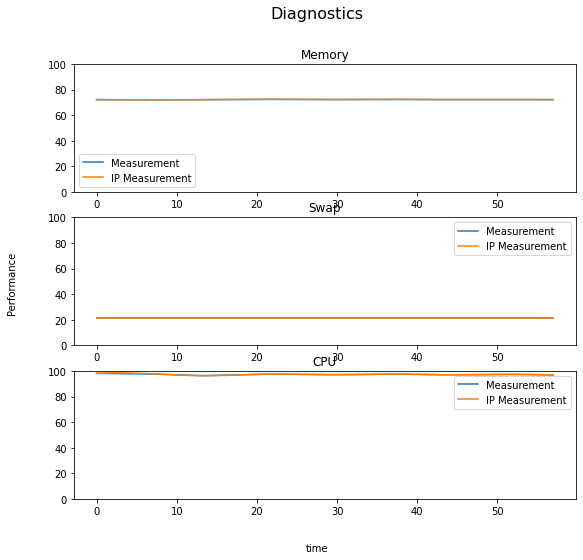

In [43]:
time_ip = np.linspace(bm_data[0][0], bm_data[0][-1], 100)
bm_ip = np.array([time_ip])
fig, axes= plt.subplots(3, 1, figsize=(9, 8))
fig.text(0.5, 0.04, 'time', ha='center', va='center')
fig.text(0.03, 0.5, 'Performance', ha='center', va='center', rotation='vertical')

for i in range(len(bm_data)-1):
    
    tck = interpolate.splrep(bm_data[0], bm_data[i+1], s=0)
    
    ip = np.array([interpolate.splev(bm_ip[0], tck, der=0)])
    bm_ip = np.append(bm_ip, ip, axis=0)
    
    axes[i].plot(bm_data[0], bm_data[i+1], bm_ip[0], bm_ip[i+1])
    axes[i].legend(['Measurement', 'IP Measurement'])
    axes[i].set_title(meas_name[i])
    axes[i].set_ylim(0, 100)
    
    
fig.suptitle('Diagnostics', fontsize=16)
plt.show()

Please change the variable `dt_core_name` below to the name, under which you ran the dt-core
If you followed carefully the instructions, this should be: 'behaviour_benchmarking'.
If you ran the normal lane_following demo you should change the variable to 'lane_following'.

In [ ]:
dt_core_name = 'cocky_banach'

In [44]:
import json
import statistics
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

assert upload.data, 'File missing, please upload in above cell'
data = json.loads(upload.data[0].decode('utf-8'))

cpu_processes = np.array([[],[],[]])
nthreads_processes = np.array([[],[],[]])
memory = np.array([[],[],[]])

t0= data['process_stats'][0]['time']
memory_max = (data['resources_stats'][0]['memory']['total'])

container_id = data['containers']

# At the moment the containers considered are:
# 'behaviour_benchmarking', ('dts-run-diagnostics-system-monitor'), 'acquisition-bridge', 'demo_all_drivers', 
# 'demo_all'

# dictionary where all container names and their corresponding keys are safed
all_keys = {}

# saves the key corresponding to the containers considered
for x in container_id:
    if container_id[x] == dt_core_name
        behaviour_benchmarking_key = x
        all_keys.update({container_id[x]: x})
    if container_id[x] == 'dts-run-diagnostics-system-monitor': 
        diagnostics_system_monitor_key = x
        all_keys.update({container_id[x]: x})
    if container_id[x] == 'acquisition-bridge': 
        acquisition_bridge_key = x
        all_keys.update({container_id[x]: x})
    if container_id[x] == 'demo_all_drivers': 
        demo_all_drivers_key = x
        all_keys.update({container_id[x]: x})
    if container_id[x] == 'demo_all': 
        demo_all_key = x
        all_keys.update({container_id[x]: x})

process_stats = data['process_stats']
container_stats = data['container_stats']

# saves the cpu usage in % (compared to the total available cpu), the number of threads as well as the memory 
# used in % (compared to the total available memory) of the single containers 
for x in process_stats:
    if x['container'] == behaviour_benchmarking_key:
        dat = np.array([[x['time']-t0,float(x['pcpu']),x['command']]])
        cpu_processes = np.append(cpu_processes,dat.T, axis=1)
        dat = np.array([[x['time']-t0,float(x['nthreads']),x['command']]])
        nthreads_processes = np.append(nthreads_processes,dat.T, axis=1)
        #place pmem instead of mem if wanted
        dat = np.array([[x['time']-t0,float(x['pmem']),x['command']]])
        memory = np.append(memory,dat.T, axis=1)

command = cpu_processes[2]
container_names = []


length = cpu_processes.shape[1]
occurrences = np.count_nonzero(cpu_processes == cpu_processes[0][2])
# Commented out as same number of occurrences as cpu
# occurrences_nthreads = np.count_nonzero(nthreads_processes == nthreads_processes[0][2])
time_ip = np.linspace(float(cpu_processes[0][0]), float(cpu_processes[0][-1]), 100)
bm_ip = np.array([time_ip])

# dictionary that sumerizes the cpu, nthreads and memory used by the different containers
summary = {'Container': {'Engineering Data Performance': 'Value'}}

for i in range(0,occurrences-1):
    pos = np.char.find(command[i],hostname_minus)
    if pos == -1:
        pos = np.char.find(command[i],hostname_underline)
    # splits the found values (cpu, nthreads and memory) into lists of the different containers                  
    current_container_name = command[i][pos:]
    container_names.append(current_container_name)
    cpu_processes_int = cpu_processes[:,i:length-1:occurrences]
    nthreads_processes_int = nthreads_processes[:,i:length-1:occurrences]
    mem_processes_int = memory[:,i:length-1:occurrences]
    
    # calculates the mean, median and std of the cpu, nthreads and memory used by the different containers
    # Also the cv is calculated, this is the coefficient of variation calculation:
    # if lower than 1, the std can be considered small enough and one can stop running tests
    # https://www.researchgate.net/post/What_do_you_consider_a_good_standard_deviation
    cpu_processes_fl = cpu_processes_int[1].astype(np.float)
    cpu_processes_mean = np.mean(cpu_processes_fl)
    cpu_processes_median = np.median(cpu_processes_fl)
    cpu_processes_std = np.std(cpu_processes_fl)
    cpu_cv = float(cpu_processes_std/cpu_processes_mean)
    nthreads_fl = nthreads_processes_int[1].astype(np.float)
    nthreads_mean = np.mean(nthreads_fl)
    nthreads_median = np.median(nthreads_fl)
    nthreads_std = np.std(nthreads_fl)
    nthreads_cv = float(nthreads_std/nthreads_mean)
    mem_fl = mem_processes_int[1].astype(np.float)
    mem_mean = np.mean(mem_fl)
    mem_median = np.median(mem_fl)
    mem_std = np.std(mem_fl)
    mem_cv = float(mem_std/mem_mean)
    
    # save the data in the dictionary 
    current = {'CPU (CPU used in %)': {'Mean' : float(cpu_processes_mean), 'Median' : float(cpu_processes_median),\
                       'Standard Deviation' : float(cpu_processes_std), 'coefficient of variation': cpu_cv}, \
               'NThreads': {'Mean' : float(nthreads_mean), 'Median' : float(nthreads_median),\
                       'Standard Deviation' : float(nthreads_std), 'coefficient of variation': nthreads_cv}, \
               'PMem (memory used in %)': {'Mean' : float(mem_mean), 'Median' : float(mem_median),\
                       'Standard Deviation' : float(mem_std), 'coefficient of variation': mem_cv, \
                       'Memory Max (bytes)': memory_max}}
    
    summary.update( {current_container_name: current} )

# Add all the data to the eng_data_all dictionary
eng_data_all.update({'Engineering data container': summary})

safe_data() 

# print(eng_data_all)    

In [45]:
container_info = {'Container Name': {'Type': 'Information'}}

# Dictionary which will hold all the "static" information about the software
# This means, the container names, their tags, version etc (see below) and also the duckiebot name of the duckiebot
# used for this benchmark
# This will be used in the final benchmark report
static_things = {}

for i, cur_key in enumerate(all_keys):

    # Not very usefull as always different
    # name = data['container_config'][demo_all_drivers_key]['Args'][1]
    image_name = data['container_config'][all_keys[cur_key]]['Config']['Image']
    image_tag = data['container_config'][all_keys[cur_key]]['Image']
    cont_name = data['container_config'][all_keys[cur_key]]['Name']
    autobot_name = data['container_config'][all_keys[cur_key]]['Config']['Hostname']
    dt_label_arch = data['container_config'][all_keys[cur_key]]['Config']['Labels']['org.duckietown.label.architecture']
    dt_label_base_img = data['container_config'][all_keys[cur_key]]['Config']['Labels']['org.duckietown.label.base.image']
    dt_code_branch = data['container_config'][all_keys[cur_key]]['Config']['Labels']['org.duckietown.label.code.branch']
    dt_code_repository = data['container_config'][all_keys[cur_key]]['Config']['Labels']['org.duckietown.label.code.repository']
    dt_code_version_major = data['container_config'][all_keys[cur_key]]['Config']['Labels']['org.duckietown.label.code.version.major']
    dt_module_type = data['container_config'][all_keys[cur_key]]['Config']['Labels']['org.duckietown.label.module.type']
    dt_template_name = data['container_config'][all_keys[cur_key]]['Config']['Labels']['org.duckietown.label.template.name']

    curr = {'Image Name': image_name, 'Image Tag': image_tag, 'Image Name and Tag': image_name + '@' + image_tag, \
            'Container Name': cont_name, 'Autobot Name': autobot_name, 'DT label architecture': dt_label_arch, \
            'DT label base image': dt_label_base_img, 'DT label code branch': dt_code_branch,\
            'DT label code repository': dt_code_repository, 'DT label code version major': dt_code_version_major,\
            'DT label module type': dt_module_type, 'DT label template name': dt_template_name}
    
    container_info.update({cur_key: curr})

    
static_things.update({'Dashboard Info': container_info})

dashboard_info = path.join(outdir, name + '_dashboard_info.yaml')

    
with open(dashboard_info, 'w') as yaml_file:
    yaml.dump(container_info, yaml_file, default_flow_style=False)
# print((data['container_config'][diagnostics_system_monitor_key]['Config']['Labels']['org.duckietown.label.base.image']))

Run the next cell such that the upload button appears. Then click on the button and select the `BAGNAME_duckiebot_constance.json` file that you should find within the folder `data/BenchmarkXY/json`.
Make sure that after selecting the file, you click into the cell below the upload button before continuing to run. 

In [46]:
from ipywidgets import FileUpload
constance = FileUpload(accept='.json',
    multiple=False)
constance

FileUpload(value={}, accept='.json', description='Upload')

Make sure you click into the cell below after you selected the correct .json file.

In [47]:
assert constance.data, 'File missing, please upload in above cell'
data = json.loads(constance.data[0].decode('utf-8'))
dict_total_cnst = {}

# Extracts all the constances name and value
# Constances are the values set on the duckiebot as example the gain, trim etc.
# These values don't change over the tests run for the same benchmark (hence static) and are reported in the final
# benchmark report.
for cnst_name in data:
    dict_total_cnst[cnst_name] = data[cnst_name]
    
# Constances added to the static_things dictionary
static_things.update({'Constants': dict_total_cnst})
    

# Path and name under which the static_things dictionary is saved
static_things = path.join(outdir, name + '_software_information.yaml')

# Path and name of the created yaml file, the file 'BAGNAME_software_information.yaml' can be found
# in the folder behaviour_benchmarking/data/BenchmarkXY/out
with open(static_things, 'w') as yaml_file:
    yaml.dump(static_things, yaml_file, default_flow_style=False)


Below there is a cell you can use to have a look at the behaviour of the CPU, NThreads and Memory of all the seperate containers over the time in which the diagnostic toolbox (and therefore the Benchmark) was running.
If you run the cell, you will see a plot an interpolated line of CPU usage, NThreads and Memory usage for each container. 

Text(0.5, 0.98, 'mem')

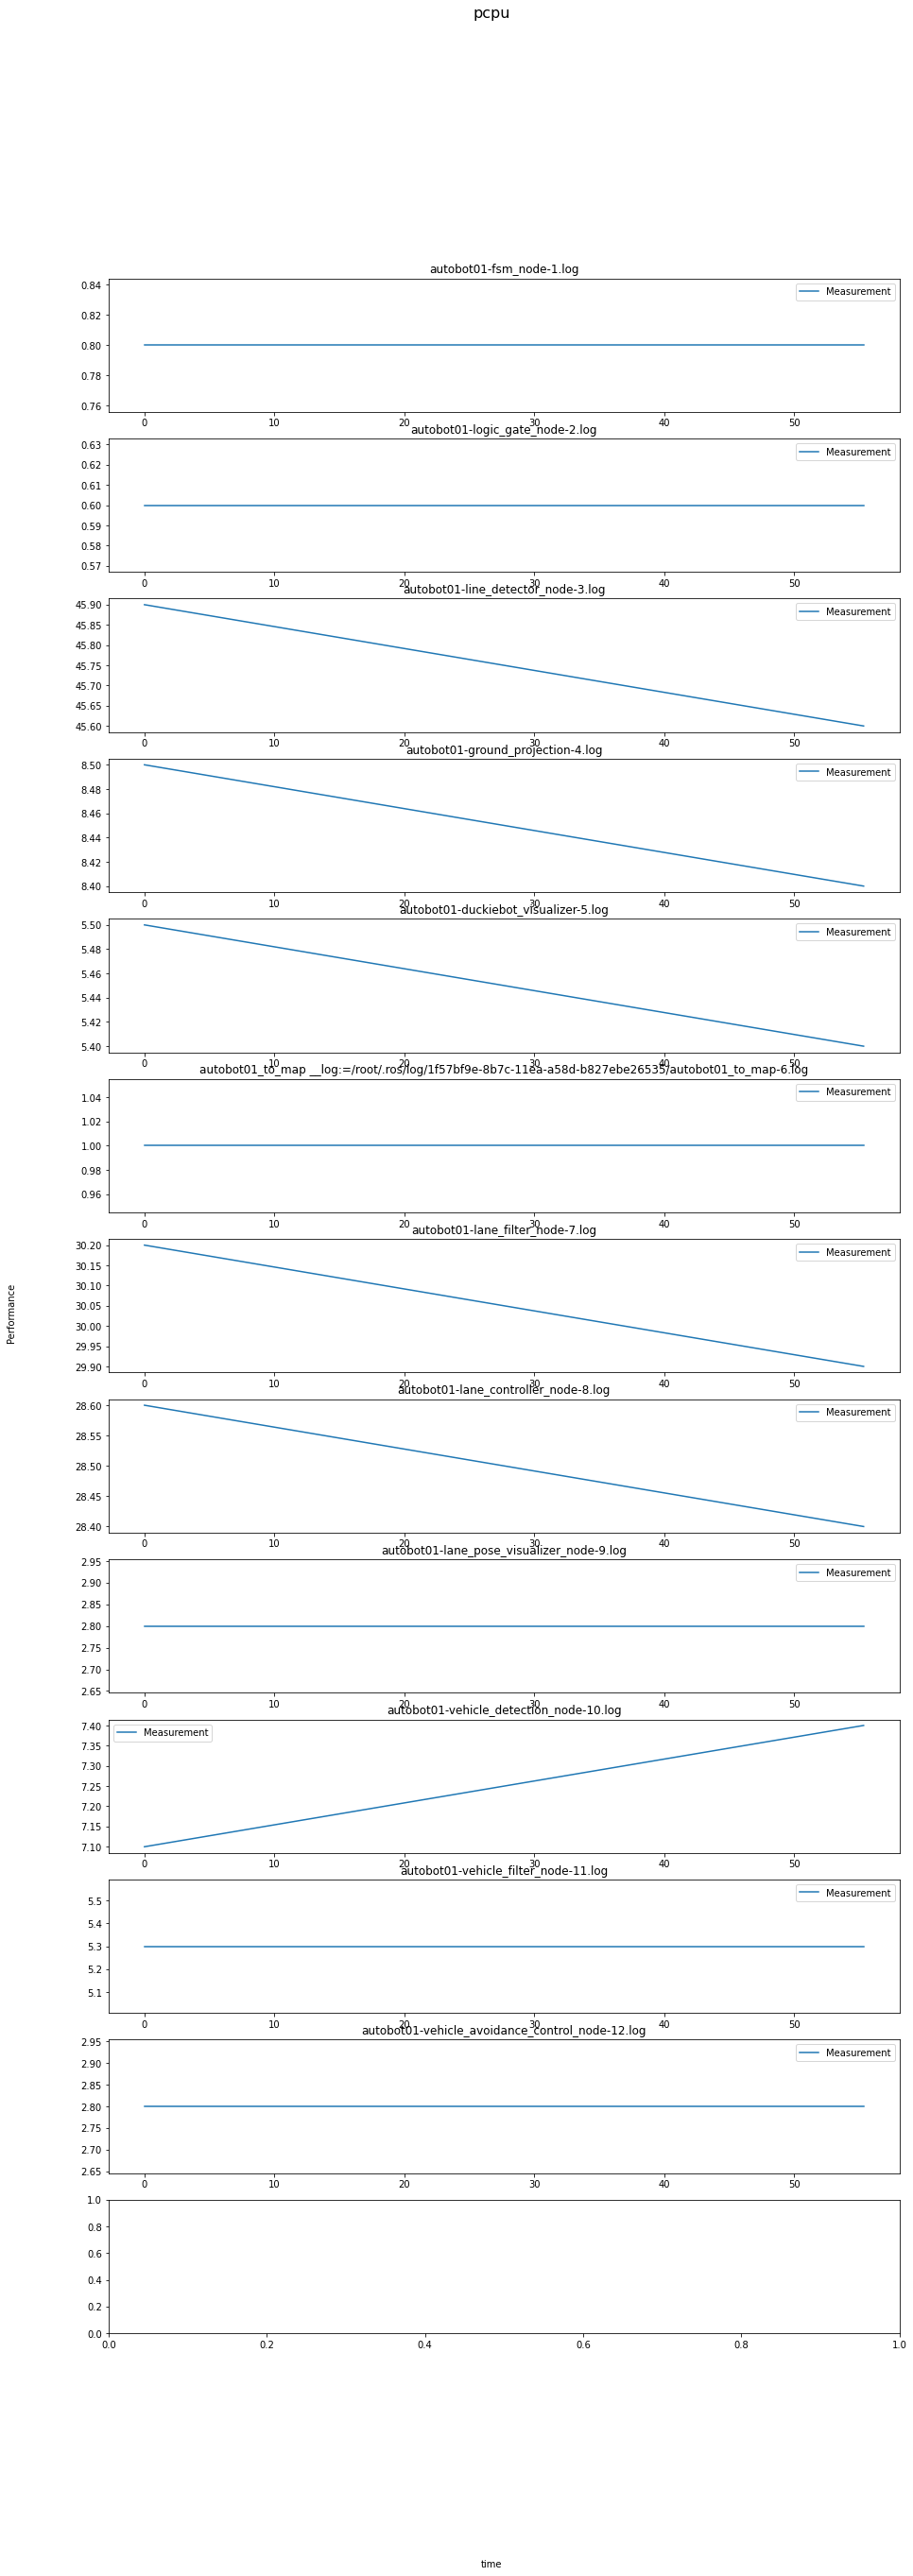

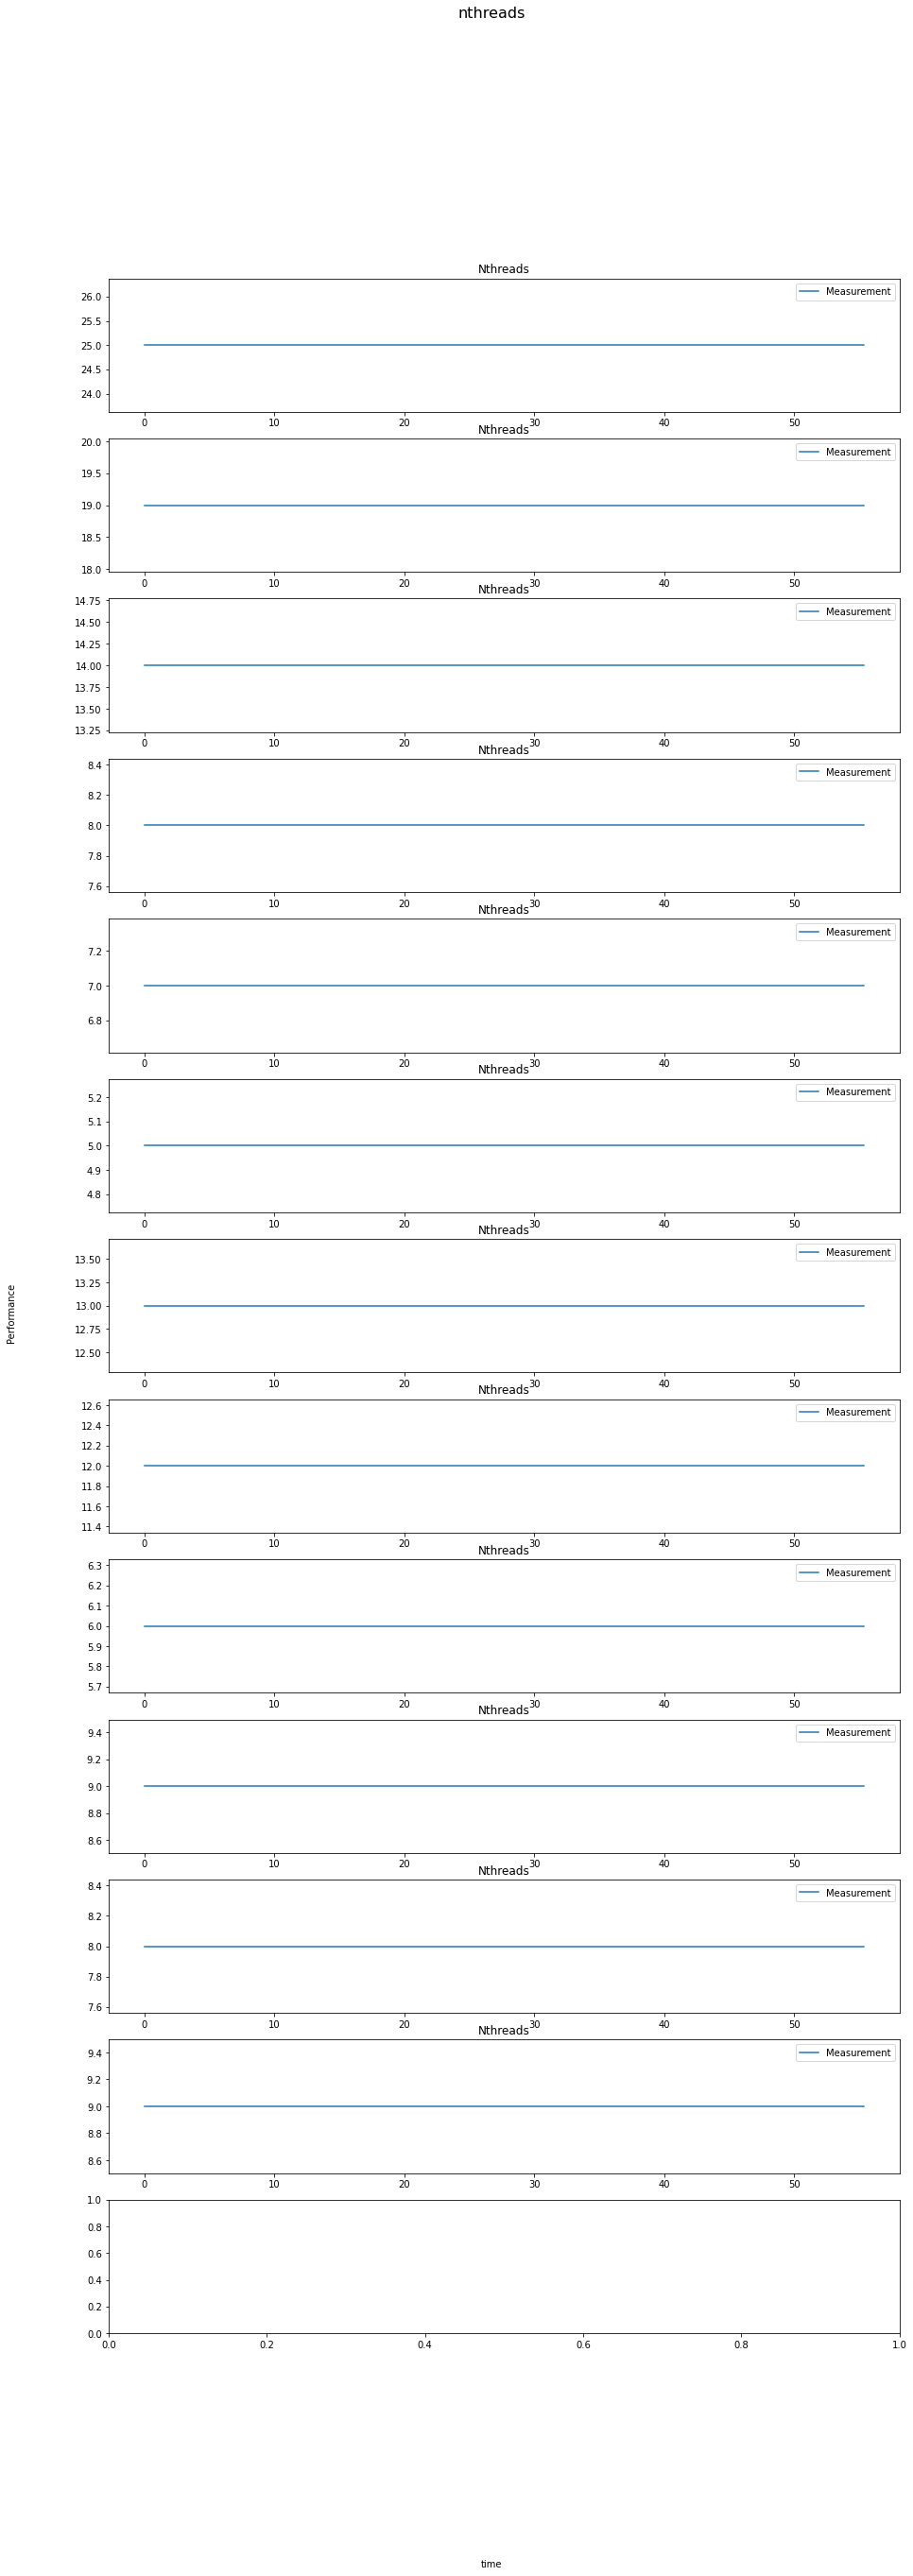

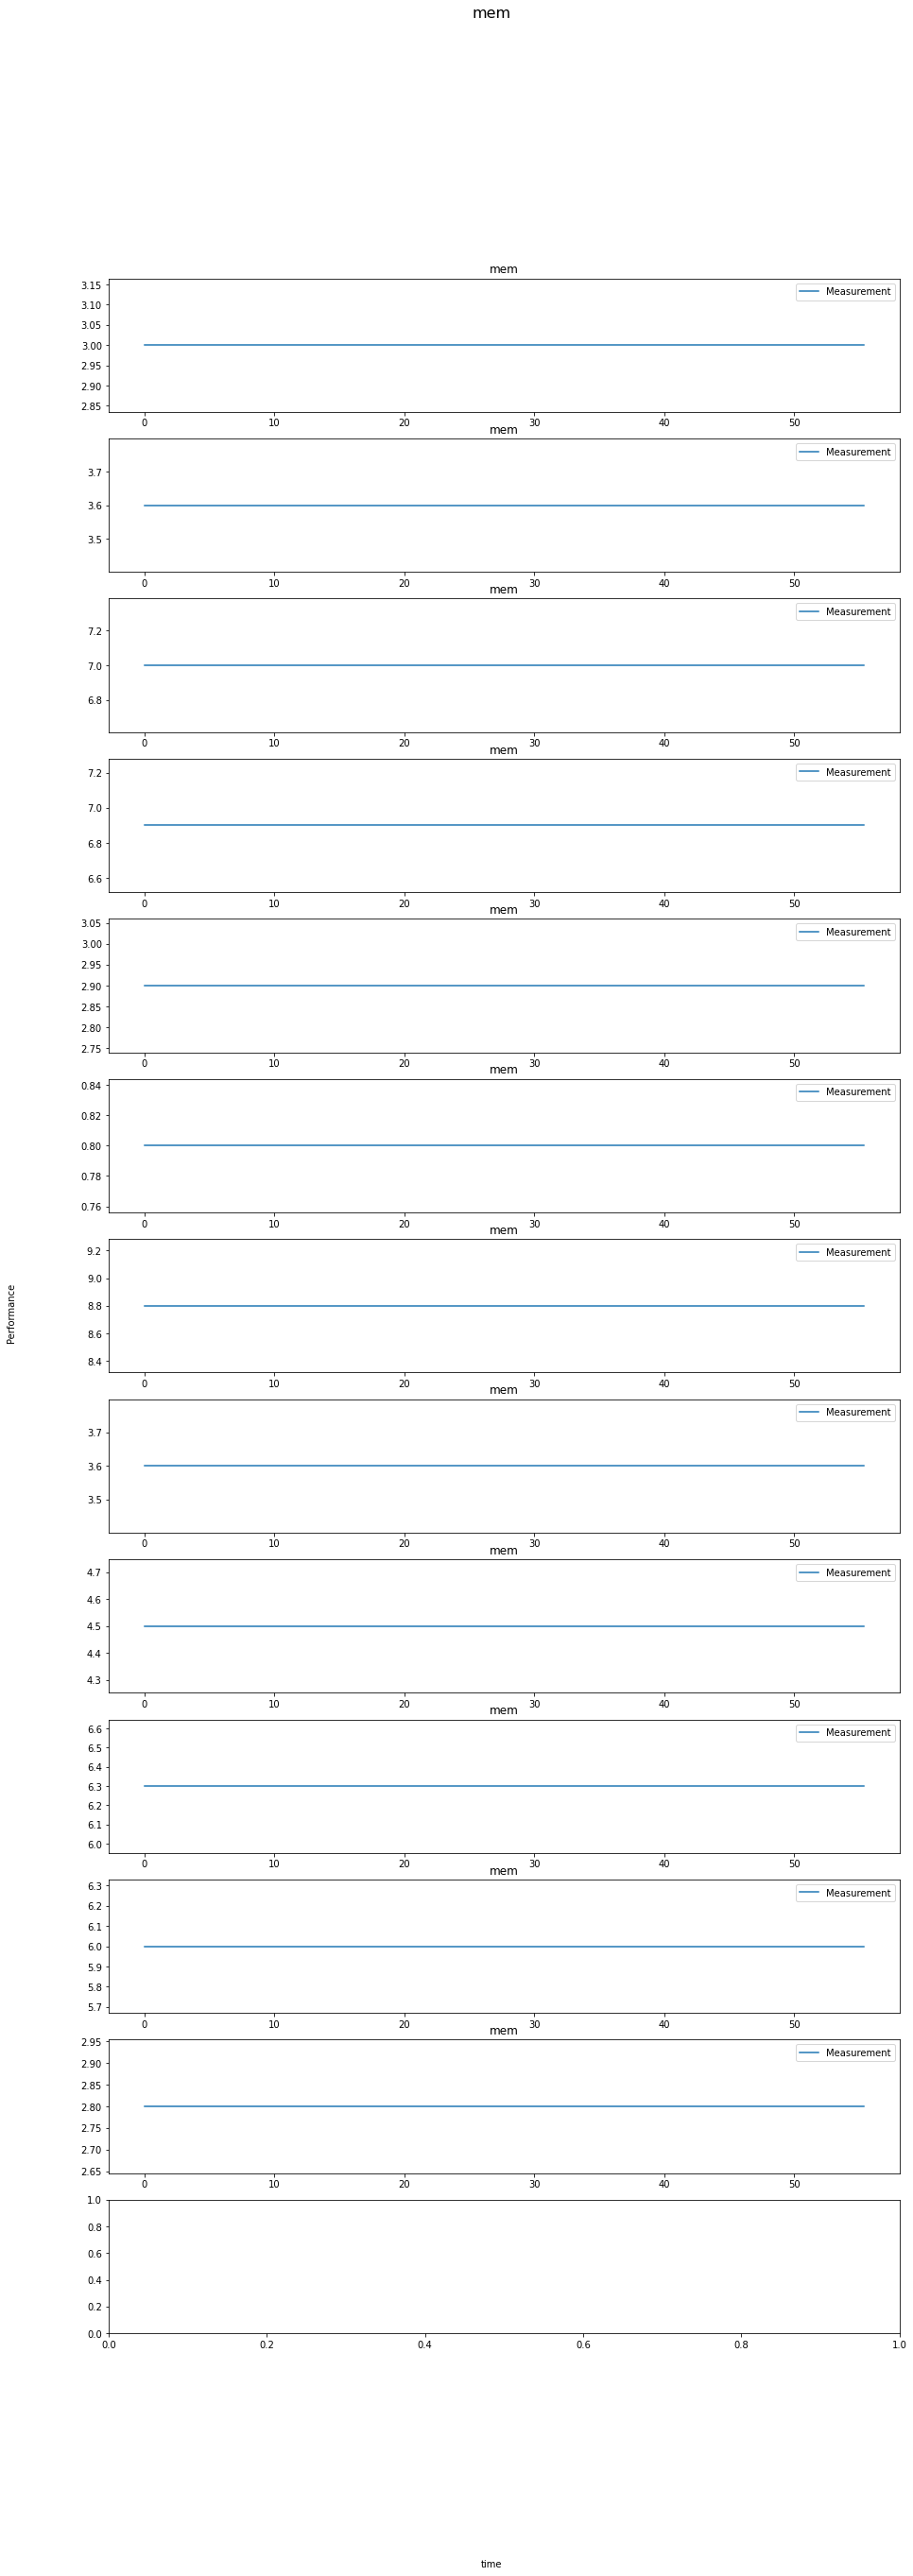

In [49]:
fig, axes= plt.subplots(occurrences, 1, figsize=(15, 40))
fig.text(0.5, 0.04, 'time', ha='center', va='center')
fig.text(0.03, 0.5, 'Performance', ha='center', va='center', rotation='vertical')

# Plots of the CPU usage behaviour over time for all containers
for i in range(0,occurrences-1):
    pos = np.char.find(command[i],hostname_minus)
    if pos == -1:
        pos = np.char.find(command[i],hostname_underline)
                       
    current_container_name = command[i][pos:]
    container_names.append(current_container_name)
    cpu_processes_int = cpu_processes[:,i:length-1:occurrences]
    
    for j in range(0,len(cpu_processes)-2):
        tck = interpolate.splrep((cpu_processes_int[0]), (cpu_processes_int[j+1]), s=0)
        ip = np.array([interpolate.splev(bm_ip[0], tck, der=0)])
        time_ip = np.linspace(float(cpu_processes_int[0][0]), float(cpu_processes_int[0][-1]), 100)
        cpu_processes_int_x = np.array([time_ip])
        value_ip = np.linspace(float(cpu_processes_int[1][0]), float(cpu_processes_int[1][-1]), 100)
        cpu_processes_int_y = np.array([value_ip])
        
        
        axes[i].plot((cpu_processes_int_x[0]), cpu_processes_int_y[0])
        axes[i].legend(['Measurement', 'IP Measurement'])
        axes[i].set_title(current_container_name)
    
         # ToDo add units to axes
    
fig.suptitle('pcpu', fontsize=16)
# plt.show()

fig, axes= plt.subplots(occurrences, 1, figsize=(15, 40))
fig.text(0.5, 0.04, 'time', ha='center', va='center')
fig.text(0.03, 0.5, 'Performance', ha='center', va='center', rotation='vertical')

# Plots of the nthreads used over time for all containers
for i in range(0,occurrences-1):
    nthreads_processes_int = nthreads_processes[:,i:length-1:occurrences]
    for j in range(0,len(cpu_processes)-2):
        tck = interpolate.splrep((nthreads_processes_int[0]), (nthreads_processes_int[j+1]), s=0)
        ip = np.array([interpolate.splev(bm_ip[0], tck, der=0)])
        time_ip = np.linspace(float(nthreads_processes_int[0][0]), float(nthreads_processes_int[0][-1]), 100)
        nthreads_processes_int_x = np.array([time_ip])
        value_ip = np.linspace(float(nthreads_processes_int[1][0]), float(nthreads_processes_int[1][-1]), 100)
        nthreads_processes_int_y = np.array([value_ip])
        
        
        axes[i].plot((nthreads_processes_int_x[0]), nthreads_processes_int_y[0])
        axes[i].legend(['Measurement', 'IP Measurement'])
        axes[i].set_title('Nthreads')
        
         # ToDo add units to axes
    
fig.suptitle('nthreads', fontsize=16)
# plt.show()


fig, axes= plt.subplots(occurrences, 1, figsize=(15, 40))
fig.text(0.5, 0.04, 'time', ha='center', va='center')
fig.text(0.03, 0.5, 'Performance', ha='center', va='center', rotation='vertical')

# Plots of the Memory usage behaviour over time for all containers
for i in range(0,occurrences-1):
    mem_processes_int = memory[:,i:length-1:occurrences]
    for j in range(0,len(cpu_processes)-2):
        tck = interpolate.splrep((mem_processes_int[0]), (mem_processes_int[j+1]), s=0)
        ip = np.array([interpolate.splev(bm_ip[0], tck, der=0)])
        time_ip = np.linspace(float(mem_processes_int[0][0]), float(mem_processes_int[0][-1]), 100)
        mem_processes_int_x = np.array([time_ip])
        value_ip = np.linspace(float(mem_processes_int[1][0]), float(mem_processes_int[1][-1]), 100)
        mem_processes_int_y = np.array([value_ip])
        
        
        axes[i].plot((mem_processes_int_x[0]), mem_processes_int_y[0])
        axes[i].legend(['Measurement', 'IP Measurement'])
        axes[i].set_title('mem')
        
        # ToDo add units to axes
    
fig.suptitle('mem', fontsize=16)